### Task # 17:
- This is Task # 17 overall, but task 2 of Week 7
### Task # 02:

### Dataset: Customer Mall

In [50]:
#importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore the specific UserWarning related to KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [51]:
# Load the Mall Customers dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

In [52]:
#check for null
df.columns[df.isnull().any()]

Index([], dtype='object')

In [53]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

### 2.1 :

In [35]:
# Select the relevant features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
from sklearn.cluster import KMeans

# Initialize K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

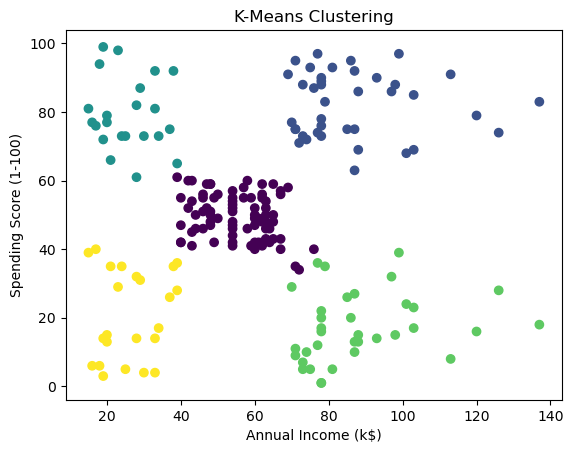

In [37]:
# Predict the cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

### 2.2 :

In [38]:
from sklearn.metrics import silhouette_score

# Define a range of cluster numbers to test
n_clusters = range(2, 10)

# Initialize lists to store the scores
silhouette_scores = []
elbow_scores = []

# Loop through each cluster number
for n in n_clusters:
    # Initialize K-Means with the current cluster number
    kmeans = KMeans(n_clusters=n, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate the Elbow Score (sum of squared distances)
    elbow_score = kmeans.inertia_
    elbow_scores.append(elbow_score)

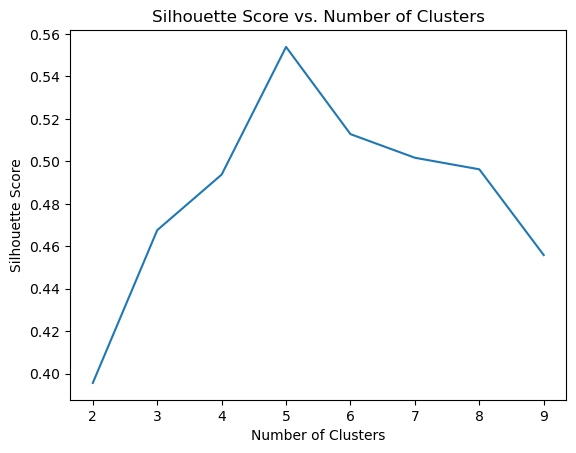

In [39]:
# Plot the Silhouette Scores
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

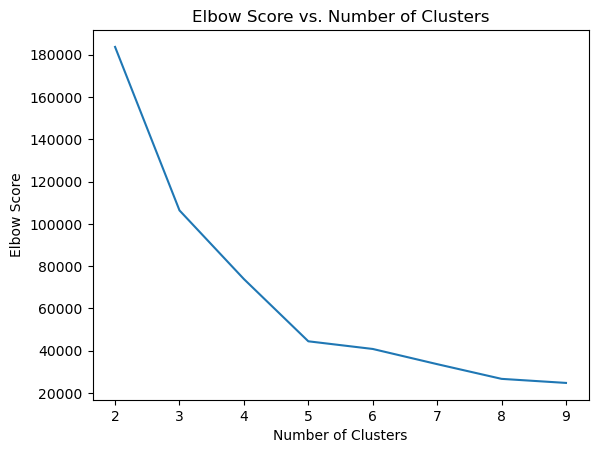

In [40]:
# Plot the Elbow Scores
plt.plot(n_clusters, elbow_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Score vs. Number of Clusters')
plt.show()

### 2.3 :

In [41]:
# Get the cluster labels
labels = kmeans.labels_

# Create a new dataframe with the cluster labels
df_clusters = pd.DataFrame({'Cluster': labels, 'Annual Income (k$)': X['Annual Income (k$)'], 'Spending Score (1-100)': X['Spending Score (1-100)']})

# Group the data by cluster and calculate the mean values
cluster_means = df_clusters.groupby('Cluster').mean()

# Print the cluster means
print(cluster_means)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 56.464789               49.774648
1                108.181818               82.727273
2                 79.000000               16.592593
3                 23.428571               84.785714
4                 24.583333                9.583333
5                 78.035714               81.892857
6                 31.533333               35.866667
7                109.700000               22.000000
8                 33.500000               66.250000


### 2.4 :

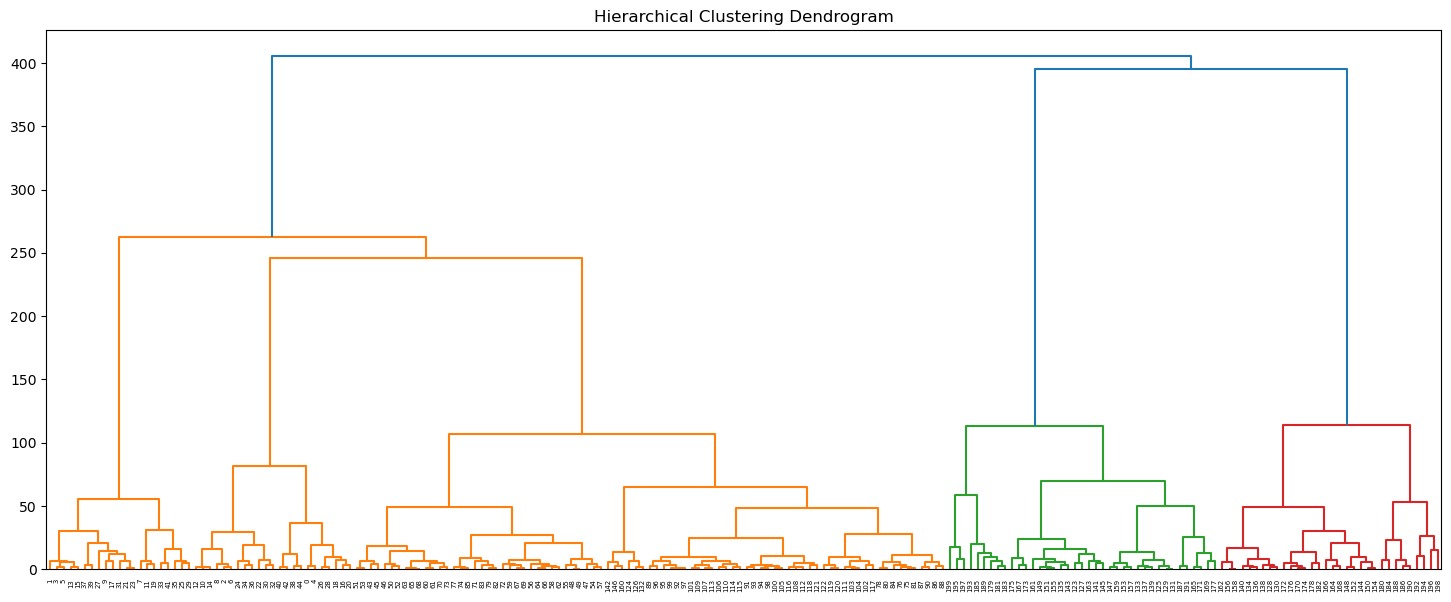

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's linkage
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(18, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### 2.5 :

In [55]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_mall_customers = pca.fit_transform(df)

In [56]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(pca_mall_customers)

In [57]:
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical clustering
hclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
hclust_labels = hclust.fit_predict(pca_mall_customers)

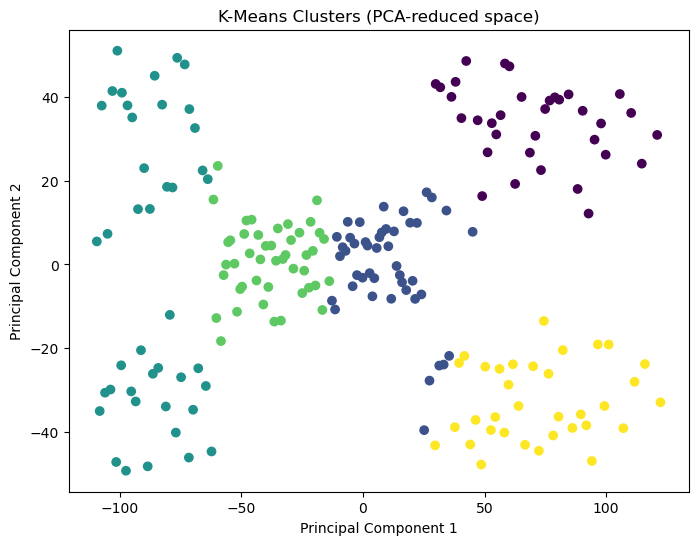

In [58]:
# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customers[:, 0], pca_mall_customers[:, 1], c=kmeans_labels)
plt.title("K-Means Clusters (PCA-reduced space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

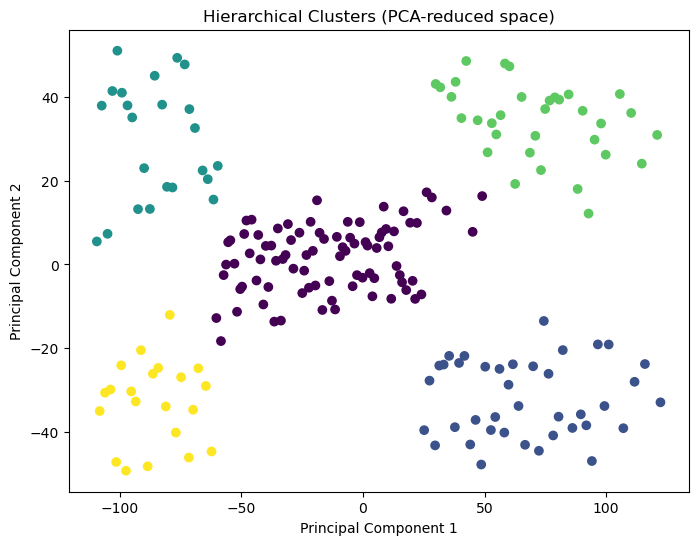

In [59]:
# Visualize Hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customers[:, 0], pca_mall_customers[:, 1], c=hclust_labels)
plt.title("Hierarchical Clusters (PCA-reduced space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()